In [106]:
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [107]:
# code imported from kaggle in order to save all the data into a pandas dataframe
# known ad business_df
data_file = open("yelp_academic_dataset_business.json")
data = []
for line in data_file:
  data.append(json.loads(line))
business_df = pd.DataFrame(data)
data_file.close()

In [108]:
# more imported code which extracts whether the business accepts credit cards
# by accessing the "attributes column"
business_df["accepts_credit_cards"] = business_df["attributes"].apply(
    lambda x: x.get("BusinessAcceptsCreditCards") if isinstance(x, dict) else None
)

#Filters by only including restaurantss, not all businesses
restaurants_df = business_df[business_df["categories"].str.contains("Restaurant", na=False)]

# creates two data sets of businesses that are cash only and businesses that
# accepts credit card
cash_only_df = restaurants_df[restaurants_df["accepts_credit_cards"] == "False"]
card_df = restaurants_df[restaurants_df["accepts_credit_cards"] == "True"]

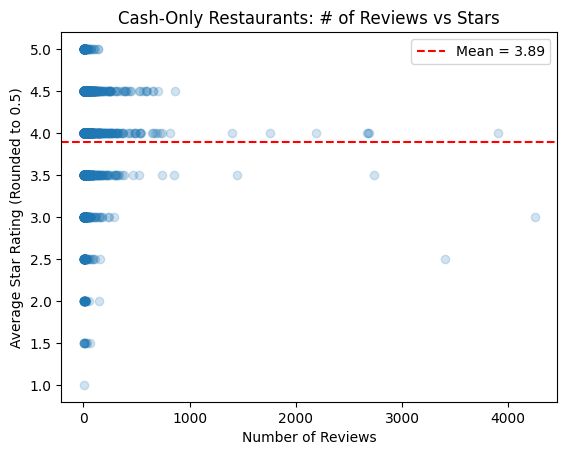

In [109]:
# Create a scatter plot for cash only businesses
# Use alpha = 0.2 to better see how many businesses are clumped together
plt.scatter(cash_only_df["review_count"], cash_only_df["stars"],alpha=0.2)

#variable that tracks mean of the ratings so I can plot it
cash_mean = cash_only_df["stars"].mean()
plt.axhline(y=cash_mean, color="red", linestyle="--", label = f"Mean = {cash_mean:0.2f}")
plt.xlabel("Number of Reviews")
plt.ylabel("Average Star Rating (Rounded to 0.5)")
plt.title("Cash-Only Restaurants: # of Reviews vs Stars")
plt.legend()
plt.show()

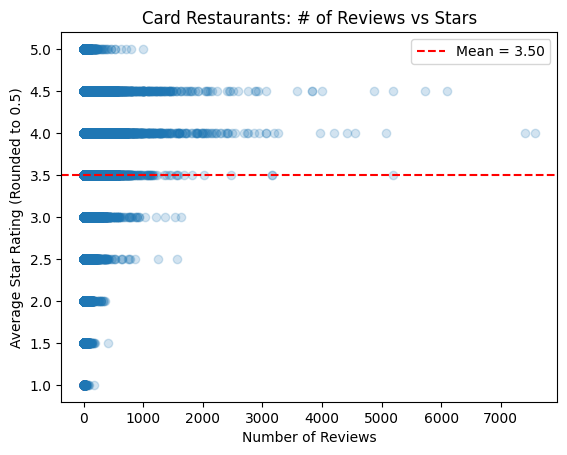

In [110]:
# Create a scatter plot for card businesses
# Use alpha = 0.2 to better see how many businesses are clumped together
plt.scatter(card_df["review_count"], card_df["stars"], alpha = 0.2)

#variable that tracks mean of the ratings so I can plot it
card_mean = card_df["stars"].mean()
plt.axhline(y=card_mean, color="red", linestyle="--", label = f"Mean = {card_mean:0.2f}")
plt.xlabel("Number of Reviews")
plt.ylabel("Average Star Rating (Rounded to 0.5)")
plt.title("Card Restaurants: # of Reviews vs Stars")
plt.legend()
plt.show()

In [111]:
print("Cash-Only Businesses: Number of Businesses by Star Rating")
print ("5.0:", (cash_only_df["stars"] == 5.0).sum())
print ("4.5:", (cash_only_df["stars"] == 4.5).sum())
print ("4.0:", (cash_only_df["stars"] == 4.0).sum())
print ("3.5:", (cash_only_df["stars"] == 3.5).sum())
print ("3.0:", (cash_only_df["stars"] == 3.0).sum())
print ("2.5:", (cash_only_df["stars"] == 2.5).sum())
print ("2.0:", (cash_only_df["stars"] == 2.0).sum())
print ("1.5:", (cash_only_df["stars"] == 1.5).sum())
print ("1.0:", (cash_only_df["stars"] == 1.0).sum())
print (f"Average Star Rating: {cash_only_df["stars"].mean():.2f}")
print (f"Average Review Count: {cash_only_df["review_count"].mean():.2f}")
print ()

print("Card-Accepting Businesses: Number of Businesses by Star Rating")
print ("5.0:", (card_df["stars"] == 5.0).sum())
print ("4.5:", (card_df["stars"] == 4.5).sum())
print ("4.0:", (card_df["stars"] == 4.0).sum())
print ("3.5:", (card_df["stars"] == 3.5).sum())
print ("3.0:", (card_df["stars"] == 3.0).sum())
print ("2.5:", (card_df["stars"] == 2.5).sum())
print ("2.0:", (card_df["stars"] == 2.0).sum())
print ("1.5:", (card_df["stars"] == 1.5).sum())
print ("1.0:", (card_df["stars"] == 1.0).sum())
print (f"Average Star Rating: {card_df["stars"].mean():.2f}")
print (f"Average Review Count: {card_df["review_count"].mean():.2f}")

Cash-Only Businesses: Number of Businesses by Star Rating
5.0: 83
4.5: 390
4.0: 448
3.5: 255
3.0: 140
2.5: 54
2.0: 26
1.5: 9
1.0: 1
Average Star Rating: 3.89
Average Review Count: 87.29

Card-Accepting Businesses: Number of Businesses by Star Rating
5.0: 1032
4.5: 6693
4.0: 11425
3.5: 10284
3.0: 6651
2.5: 4163
2.0: 2479
1.5: 1254
1.0: 160
Average Star Rating: 3.50
Average Review Count: 97.20


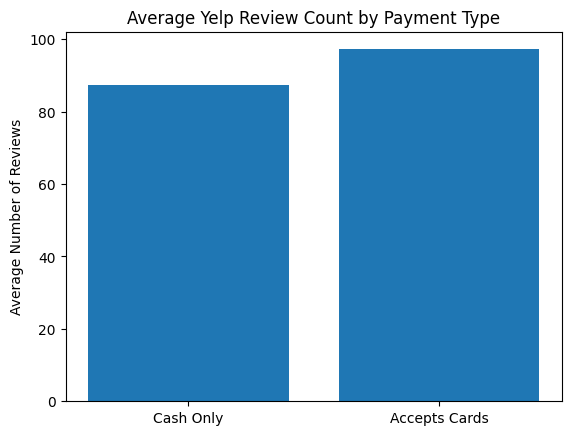

In [112]:
# tracks the average reviews for each restaurant type
avg_reviews = [cash_only_df["review_count"].mean(),card_df["review_count"].mean()]

#creates a bar chart that compares these average review counts
plt.bar(["Cash Only", "Accepts Cards"], avg_reviews)
plt.ylabel("Average Number of Reviews")
plt.title("Average Yelp Review Count by Payment Type")
plt.show()